<a href="https://www.kaggle.com/code/mitrabrindamukherjee/krishivision?scriptVersionId=194947923" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/tomato/image (16).jpeg
/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/tomato/image (4).jpeg
/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/tomato/image (5).jpg
/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/tomato/image (12).jpeg
/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/tomato/image (7).jpg
/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/tomato/image (6).jpg
/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/tomato/image (9).jpg
/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/tomato/image (1).jpeg
/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/tomato/image (2).jpg
/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/tomato/image (5).jpeg
/kaggle/input/agricultural-crops-image-classification

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [9]:
# Define the dataset directory
data_dir = '/kaggle/input/agricultural-crops-image-classification/Agricultural-crops'

# List all subdirectories (classes) in the dataset directory
classes = os.listdir(data_dir)
print(f"Classes: {classes}")

Classes: ['tomato', 'chilli', 'clove', 'pineapple', 'vigna-radiati(Mung)', 'Olive-tree', 'coconut', 'papaya', 'Tobacco-plant', 'jute', 'jowar', 'gram', 'tea', 'maize', 'wheat', 'soyabean', 'Pearl_millet(bajra)', 'Lemon', 'Fox_nut(Makhana)', 'mustard-oil', 'sugarcane', 'almond', 'Cucumber', 'sunflower', 'cotton', 'banana', 'Cherry', 'cardamom', 'rice', 'Coffee-plant']


In [10]:
# Count images in each class
image_count = {cls: len(glob(os.path.join(data_dir, cls, '*.jpg'))) for cls in classes}
print("Number of images per class:")
print(image_count)

Number of images per class:
{'tomato': 10, 'chilli': 0, 'clove': 15, 'pineapple': 25, 'vigna-radiati(Mung)': 22, 'Olive-tree': 19, 'coconut': 20, 'papaya': 22, 'Tobacco-plant': 19, 'jute': 18, 'jowar': 20, 'gram': 15, 'tea': 4, 'maize': 21, 'wheat': 27, 'soyabean': 22, 'Pearl_millet(bajra)': 35, 'Lemon': 9, 'Fox_nut(Makhana)': 7, 'mustard-oil': 18, 'sugarcane': 18, 'almond': 18, 'Cucumber': 29, 'sunflower': 19, 'cotton': 29, 'banana': 28, 'Cherry': 18, 'cardamom': 8, 'rice': 16, 'Coffee-plant': 29}


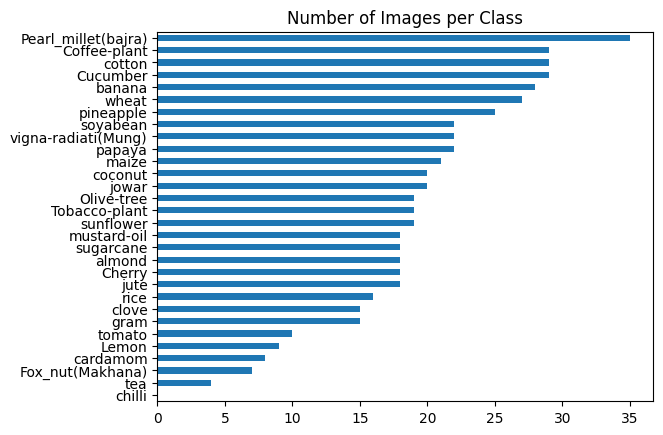

In [11]:
# Visualize the number of images per class
pd.Series(image_count).sort_values().plot(kind='barh')
plt.title('Number of Images per Class')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
# Define parameters
IMG_SIZE = 224
BATCH_SIZE = 32

# Create an ImageDataGenerator for training, validation, and test sets
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 80% training, 20% validation
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [14]:
# Training and validation generators
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 674 images belonging to 30 classes.
Found 155 images belonging to 30 classes.


In [15]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [16]:
# Load MobileNetV2 without pre-trained weights
base_model = MobileNetV2(weights=None, include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

In [17]:
# Freeze the base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Adding dropout for regularization
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(classes), activation='softmax')(x)  # Number of classes in the dataset

In [18]:

# Build the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with corrected argument
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,600,478 (13.73 MB)

 Trainable params: 1,342,494 (5.12 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks with corrected file extension
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

In [20]:
# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.0356 - loss: 3.4013 - val_accuracy: 0.0452 - val_loss: 3.3982
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.0440 - loss: 3.3980 - val_accuracy: 0.0452 - val_loss: 3.3958
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.0468 - loss: 3.3949 - val_accuracy: 0.0452 - val_loss: 3.3936
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.0380 - loss: 3.3978 - val_accuracy: 0.0452 - val_loss: 3.3934
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.0513 - loss: 3.3919 - val_accuracy: 0.0452 - val_loss: 3.3919
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.0459 - loss: 3.3988 - val_accuracy: 0.0452 - val_loss: 3.3929
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.0449 - loss: 3.3977 - val_accuracy: 0.0452 - val_loss: 3.3925
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.0592 - loss: 3.3917 - val_accuracy: 0.0452 - val_loss: 3.3919
Epo

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [22]:
# Load the best model
model.load_weights('best_model.keras')

In [23]:
# Evaluate on validation data
val_loss, val_acc = model.evaluate(val_generator)
print(f'Validation Accuracy: {val_acc}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 949ms/step - accuracy: 0.0415 - loss: 3.3972
Validation Accuracy: 0.04516129195690155


In [24]:
# Predict on validation data
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step  


In [25]:
# Classification report
print(classification_report(y_true, y_pred_classes, target_names=classes))

                     precision    recall  f1-score   support

             tomato       0.00      0.00      0.00         6
             chilli       0.00      0.00      0.00         5
              clove       0.00      0.00      0.00         6
          pineapple       0.00      0.00      0.00         4
vigna-radiati(Mung)       0.00      0.00      0.00         5
         Olive-tree       0.00      0.00      0.00         6
            coconut       0.05      1.00      0.09         7
             papaya       0.00      0.00      0.00         6
      Tobacco-plant       0.00      0.00      0.00         4
               jute       0.00      0.00      0.00         6
              jowar       0.00      0.00      0.00         4
               gram       0.00      0.00      0.00         4
                tea       0.00      0.00      0.00         6
              maize       0.00      0.00      0.00         5
              wheat       0.00      0.00      0.00         6
           soyabean    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


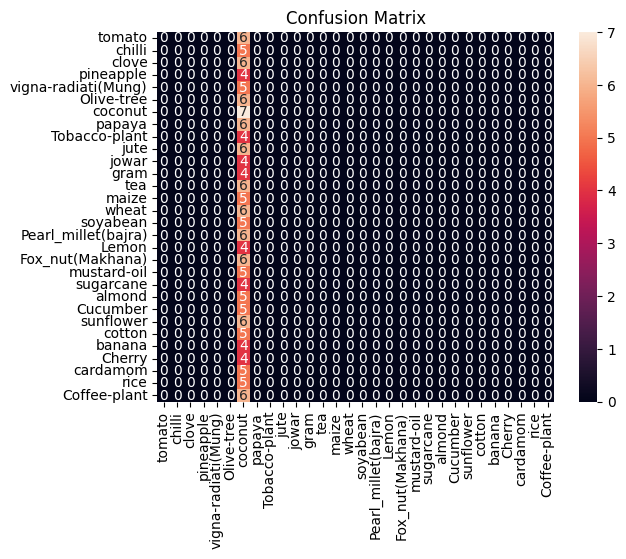

In [26]:
# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.show()

In [27]:
# Unfreeze the last few layers of the base model
for layer in base_model.layers[-20:]:
    layer.trainable = True

In [28]:
# Recompile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
# Train again with the unfrozen model
history_fine_tune = model.fit(
    train_generator,
    epochs=10,  # Fine-tuning for a few more epochs
    validation_data=val_generator,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.0756 - loss: 3.4898 - val_accuracy: 0.0452 - val_loss: 3.3982
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.0437 - loss: 3.4943 - val_accuracy: 0.0452 - val_loss: 3.3983
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.0546 - loss: 3.4852 - val_accuracy: 0.0452 - val_loss: 3.3983
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.0366 - loss: 3.4874 - val_accuracy: 0.0452 - val_loss: 3.3983
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.0419 - loss: 3.4235 - val_accuracy: 0.0452 - val_loss: 3.3983


In [30]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [31]:
# Save the optimized and fine-tuned model
model.save('final_model.keras')

In [5]:
# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

NameError: name 'model' is not defined